## Logistic Regression: how would Salary, Age & Gender influence one to buy a Car ?

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as  np
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix

%matplotlib inline



In [72]:
cars = pd.read_csv('/Users/gracechongzuting/Downloads/car_data.csv')

In [73]:
cars.shape

(1000, 5)

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [ ]:
cars.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [ ]:
for column in cars.columns:
    check_null = np.mean(cars[column].isnull())
    print(f'{column} has {check_null}% null')

User ID has 0.0% null
Gender has 0.0% null
Age has 0.0% null
AnnualSalary has 0.0% null
Purchased has 0.0% null


In [ ]:
cars.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [ ]:
cars.drop(columns='User ID', inplace=True)

In [ ]:
cars.head()

,Gender,Age,AnnualSalary,Purchased
0,Male,35,20000,0
1,Male,40,43500,0
2,Male,49,74000,0
3,Male,40,107500,1
4,Male,25,79000,0


In [ ]:
cars.corr()

,Age,AnnualSalary,Purchased
Age,1.000000,0.166042,0.616036
AnnualSalary,0.166042,1.000000,0.364974
Purchased,0.616036,0.364974,1.000000


<AxesSubplot:>

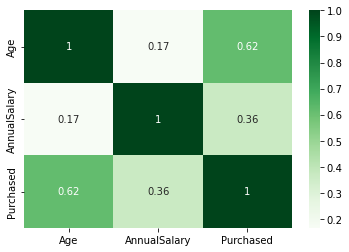

In [ ]:
sns.heatmap(cars.corr(),annot=True,cmap='Greens')

<AxesSubplot:>

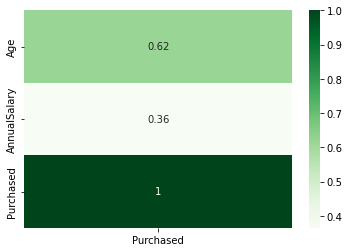

In [ ]:
sns.heatmap(cars.corr()[['Purchased']],annot=True,cmap='Greens')

In [ ]:
X = cars[['Age']]
y = cars['Purchased']




In [ ]:
print(X.shape)
print(y.shape)

(1000, 1)
(1000,)


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state=42)

In [ ]:
cars_logistic = LogisticRegression()

In [ ]:
cars_logistic.fit(X_train,y_train)

LogisticRegression()

In [ ]:
cars_logistic.score(X_test,y_test)

0.8212121212121212

In [ ]:
print(cars_logistic.intercept_)
print(cars_logistic.coef_)

[-7.64047877]
[[0.17439077]]


In [ ]:
cars_logistic.predict(X_test)

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,

In [ ]:
X_test.shape

(330, 1)

In [ ]:
Z_proba = np.round(cars_logistic.predict_proba(X_test),2)
Z_proba



array([[0.62, 0.38],
       [0.07, 0.93],
       [0.96, 0.04],
       [0.36, 0.64],
       [0.41, 0.59],
       [0.17, 0.83],
       [0.12, 0.88],
       [0.8 , 0.2 ],
       [0.62, 0.38],
       [0.89, 0.11],
       [0.62, 0.38],
       [0.94, 0.06],
       [0.66, 0.34],
       [0.82, 0.18],
       [0.25, 0.75],
       [0.45, 0.55],
       [0.36, 0.64],
       [0.12, 0.88],
       [0.33, 0.67],
       [0.98, 0.02],
       [0.8 , 0.2 ],
       [0.7 , 0.3 ],
       [0.41, 0.59],
       [0.95, 0.05],
       [0.14, 0.86],
       [0.66, 0.34],
       [0.25, 0.75],
       [0.33, 0.67],
       [0.82, 0.18],
       [0.22, 0.78],
       [0.58, 0.42],
       [0.04, 0.96],
       [0.29, 0.71],
       [0.95, 0.05],
       [0.33, 0.67],
       [0.49, 0.51],
       [0.96, 0.04],
       [0.62, 0.38],
       [0.7 , 0.3 ],
       [0.82, 0.18],
       [0.58, 0.42],
       [0.45, 0.55],
       [0.95, 0.05],
       [0.98, 0.02],
       [0.29, 0.71],
       [0.73, 0.27],
       [0.93, 0.07],
       [0.17,

In [ ]:
cars_logistic.score(X_train, y_train)

0.8059701492537313

In [ ]:
cars_logistic.score(X_test, y_test)

0.8212121212121212

<AxesSubplot:xlabel='Age', ylabel='Purchased'>

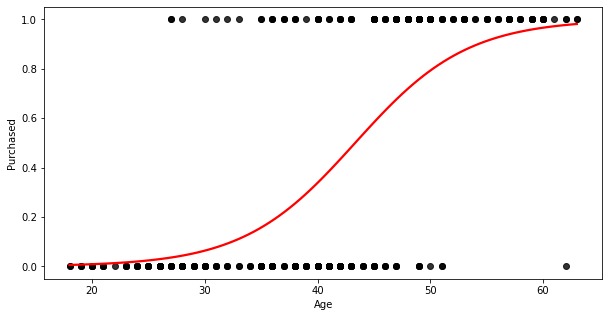

In [ ]:
plt.figure(figsize = (10, 5))
x = X_test
y = y_test

#plot logistic regression curve
sns.regplot(x=x, y=y, data=cars_logistic, logistic=True, ci=None, scatter_kws={'color': 'black'}, line_kws={'color': 'red'})

#### K-nearest neighbour 

In [88]:
X_knn = cars[['Age']]
y_knn = cars['Purchased']



In [89]:
X_knn.shape

(1000, 1)

In [90]:
y_knn.shape

(1000,)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_knn, y_knn , random_state=42)

In [96]:
ss = StandardScaler()
X_train_ss= ss.fit_transform(X_train) 
X_test_ss= ss.transform(X_test)

In [97]:
knn = KNeighborsClassifier()

In [98]:
knn.fit(X_train_ss,y_train)

KNeighborsClassifier()

In [100]:
print(f'{knn.score(X_train_ss,y_train)}')
print(f'{knn.score(X_test_ss,y_test)}')

0.792
0.788


#### Confusion Matrix - to determine best threshold values to indicate if it is a False Positive or True Positive.

In [102]:
y_predict = knn.predict(X_test_ss)
y_predict

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1])

In [103]:
y_test

521    0
737    1
740    0
660    1
411    0
      ..
109    1
430    0
77     0
84     1
286    1
Name: Purchased, Length: 250, dtype: int64

In [104]:
cm = confusion_matrix(y_predict, y_test)
cm

array([[112,  27],
       [ 26,  85]])

In [105]:
tn, fp, fn , tp = confusion_matrix(y_test,y_predict).ravel()

/Users/gracechongzuting/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


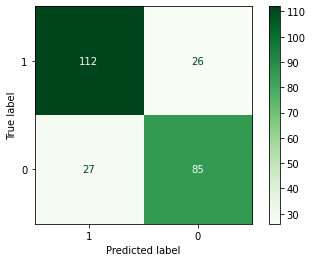

In [106]:
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix

plot_confusion_matrix(knn,X_test_ss,y_test,cmap='Greens',
                      values_format = 'd', display_labels=['1','0'])

##### to have a much better visualisation, we create a dataframe.

In [108]:
cm_df = pd.DataFrame(cm , columns=['Predicted Positive','Predicted Negative'], index= ['True Positive','True Negative'])
cm_df

,Predicted Positive,Predicted Negative
True Positive,112,27
True Negative,26,85


In [109]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,roc_curve,plot_roc_curve



print(f'the accuracy_score is {accuracy_score(y_test, y_predict)}')
print(f'the recall_score is {recall_score(y_test,y_predict)}')
print(f'the precision_score is {precision_score(y_test, y_predict)}')

the accuracy_score is 0.788
the recall_score is 0.7589285714285714
the precision_score is 0.7657657657657657


/Users/gracechongzuting/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'True Positive Rate = Sensitivity')

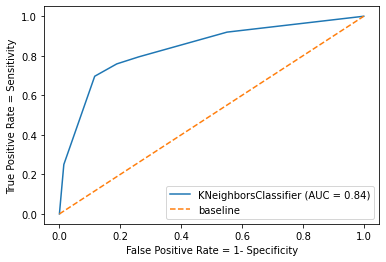

In [110]:
plot_roc_curve(knn,X_test_ss,y_test)
plt.plot ([0,1],[0,1],
          label = 'baseline', linestyle='--' )
plt.legend()
plt.xlabel('False Positive Rate = 1- Specificity')
plt.ylabel('True Positive Rate = Sensitivity')